In [51]:
#SHADRACK OMONDI 
#INTE/MG/2884/09/22

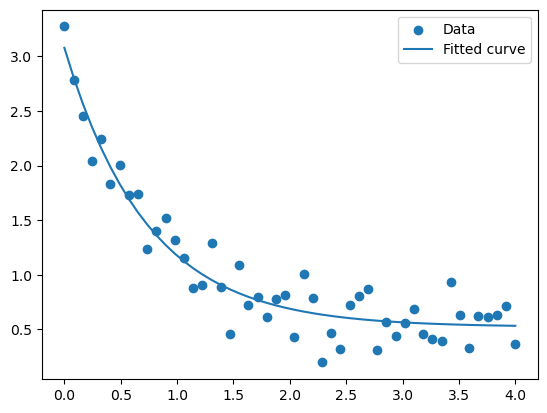

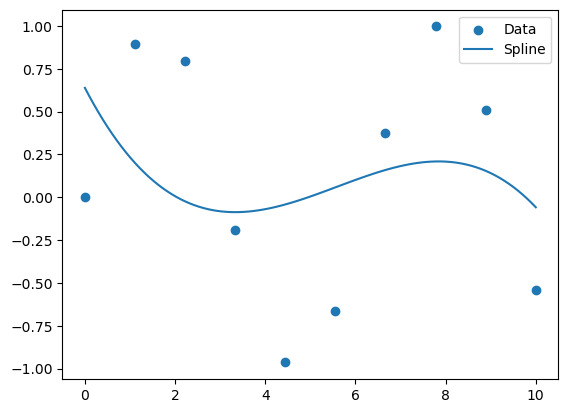

In [55]:
'''b) Using PYTHON show how the following is achieved(PRACTICAL)
i. Differentiation
ii. Numerical integration
iii. Curve Fitting
iv. Linear Regression
v. Spline Interpolation
'''
#i. Differentiation
import sympy as sp

x = sp.symbols('x')
f = sp.sin(x) * sp.exp(x)

f_prime = sp.diff(f, x)
f_prime


#ii. Numerical Integration
import scipy.integrate as spi
import numpy as np
def f(x):
    return np.sin(x) * np.exp(x)

integral, error = spi.quad(f, 0, np.pi)

integral, error


#iii. Curve Fitting
import scipy.optimize as opt
import matplotlib.pyplot as plt
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
xdata = np.linspace(0, 4, 50)
ydata = func(xdata, 2.5, 1.3, 0.5) + 0.2 * np.random.normal(size=len(xdata))
popt, pcov = opt.curve_fit(func, xdata, ydata)

# Plot the data and the fitted curve
plt.scatter(xdata, ydata, label='Data')
plt.plot(xdata, func(xdata, *popt), label='Fitted curve')
plt.legend()
plt.show()


#iv. Linear Regression
from sklearn.linear_model import LinearRegression
x = np.array([1, 2, 3, 4, 5]).reshape((-1, 1))
y = np.array([1, 3, 2, 5, 4])
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
intercept = model.intercept_
slope = model.coef_

r_sq, intercept, slope


#v. Spline Interpolation
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 10)
y = np.sin(x)
spl = UnivariateSpline(x, y)
x_new = np.linspace(0, 10, 100)
y_new = spl(x_new)

# Plot the results
plt.scatter(x, y, label='Data')
plt.plot(x_new, y_new, label='Spline')
plt.legend()
plt.show()


In [57]:
#C
import numpy as np
x1, y1 = 2.00, 7.2
x2, y2 = 4.25, 7.1
x = 4.0
y = y1 + ((y2 - y1) / (x2 - x1)) * (x - x1)

# Print the result
y



7.111111111111111

In [59]:
#D
import sympy as sp
x = sp.symbols('x')
f = x**3 - 0.165 * x**2 + 3.993e-4
f_prime = sp.diff(f, x)
f_numeric = sp.lambdify(x, f, 'numpy')
f_prime_numeric = sp.lambdify(x, f_prime, 'numpy')

# Initial guess
x_n = 0.05  

# Number of iterations
iterations = 3
results = []
for i in range(iterations):
    f_x_n = f_numeric(x_n)
    f_prime_x_n = f_prime_numeric(x_n)
    x_n1 = x_n - f_x_n / f_prime_x_n
    relative_error = abs((x_n1 - x_n) / x_n1)
    results.append((x_n1, relative_error))
    x_n = x_n1

# Display the results
results


[(0.06242222222222221, 0.19900320398718388),
 (0.062377576543465846, 0.0007157328198740867),
 (0.06237758151374945, 7.968060769175679e-08)]

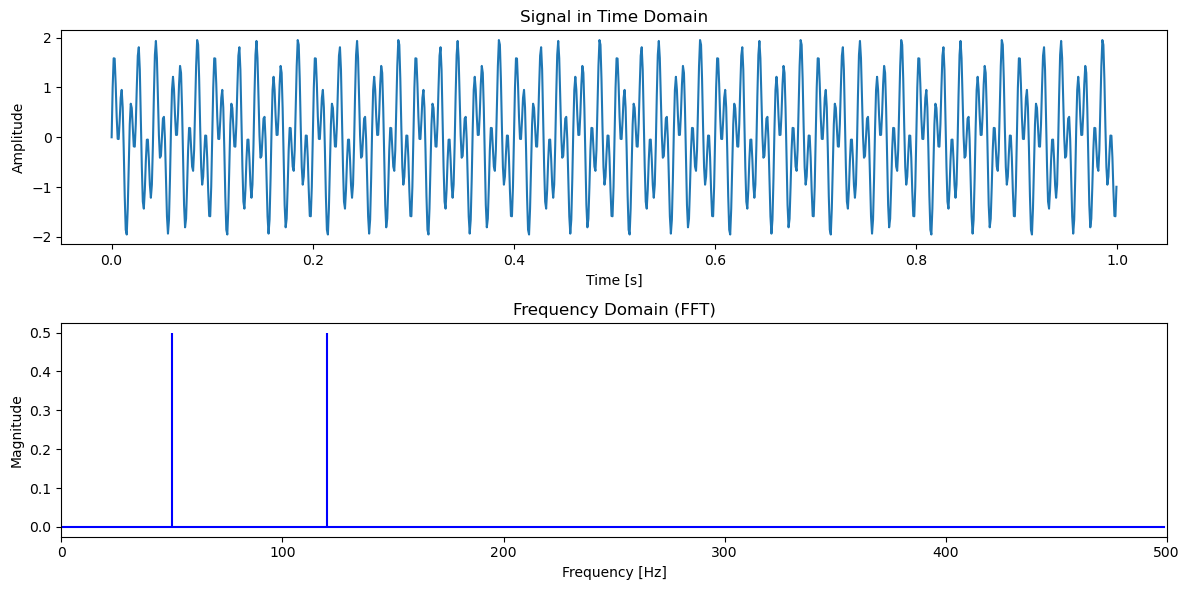

In [61]:
#E
import numpy as np
import matplotlib.pyplot as plt

def compute_fft():
    # Parameters
    f1 = 50  
    f2 = 120 
    fs = 1000 
    t = np.arange(0, 1, 1/fs) 

    # Signal
    s = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

    n = len(s) 
    S = np.fft.fft(s)
    S = S / n 
    S = S[:n//2] 

    freq = np.fft.fftfreq(n, d=1/fs)[:n//2]

    # Plot the signal
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(t, s)
    plt.title('Signal in Time Domain')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')

    # Plot the FFT
    plt.subplot(2, 1, 2)
    plt.stem(freq, np.abs(S), 'b', markerfmt=" ", basefmt="-b")
    plt.title('Frequency Domain (FFT)')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.xlim(0, fs/2)

    plt.tight_layout()
    plt.show()

# Call the function to compute and plot the FFT
compute_fft()


Approximate integral of sin(x) from 0 to 3.141592653589793 using 10 trapezoids is 1.9835235375094546


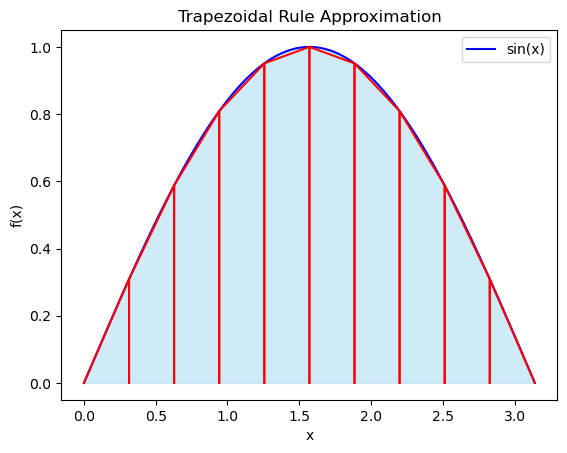

In [63]:
#G
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x) 

def trapezoidal_rule(a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x)
    integral = (h / 2) * (y[0] + 2 * np.sum(y[1:n]) + y[n])
    return integral

a = 0  
b = np.pi  
n = 10  
integral = trapezoidal_rule(a, b, n)

print(f"Approximate integral of sin(x) from {a} to {b} using {n} trapezoids is {integral}")

x = np.linspace(a, b, 1000)
y = f(x)

plt.plot(x, y, 'b', label='sin(x)')
plt.fill_between(x, 0, y, color='skyblue', alpha=0.4)

x_trap = np.linspace(a, b, n+1)
y_trap = f(x_trap)

for i in range(n):
    plt.plot([x_trap[i], x_trap[i], x_trap[i+1], x_trap[i+1]], [0, y_trap[i], y_trap[i+1], 0], 'r')

plt.title('Trapezoidal Rule Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


Lagrange Polynomial Coefficients: [ 1.  4.  9. 16.]
Newton Polynomial Coefficients: [1. 3. 1. 0.]
P(2.5) = 6.25


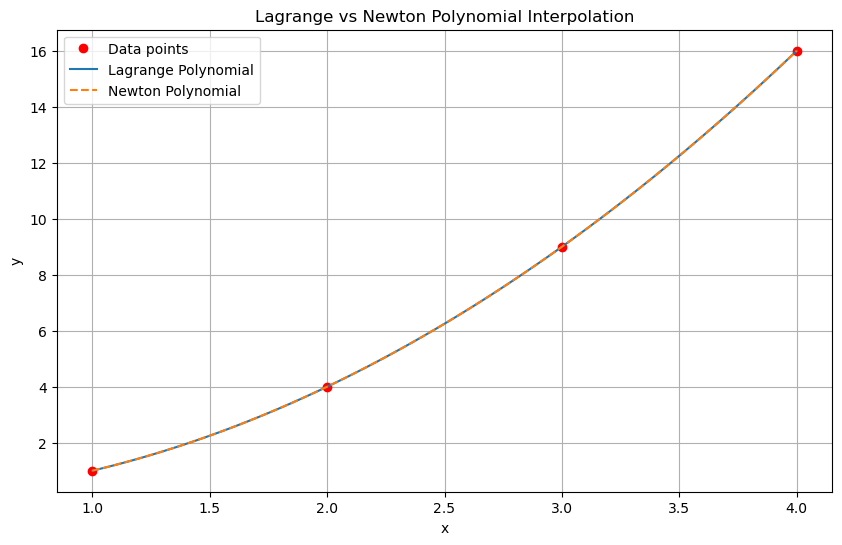

In [71]:
#I
#1. Lagrange Polynomial Interpolation
import numpy as np

def lagrange_interpolation(x, y):
    def L(k, x):
        Lk = 1
        for j in range(len(x)):
            if j != k:
                Lk *= (x - x[j]) / (x[k] - x[j])
        return Lk
    
    def lagrange_polynomial(x_points, y_points):
        polynomial = 0
        for k in range(len(x_points)):
            polynomial += y_points[k] * L(k, x_points)
        return polynomial
    
    x_points = np.array(x)
    y_points = np.array(y)
    
    return lagrange_polynomial(x_points, y_points)

# Given data points
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]

lagrange_poly = lagrange_interpolation(x, y)
print("Lagrange Polynomial Coefficients:", lagrange_poly)


#2. Newton's Divided Difference Method
import numpy as np

def newton_divided_difference(x, y):
    n = len(x)
    coef = np.zeros([n, n])
    coef[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i, j] = (coef[i + 1, j - 1] - coef[i, j - 1]) / (x[i + j] - x[i])

    return coef[0, :]

def newton_polynomial(coef, x, x_data):
    n = len(coef)
    p = coef[0]
    for k in range(1, n):
        term = coef[k]
        for i in range(k):
            term *= (x - x_data[i])
        p += term
    return p

# Given data points
x_data = [1, 2, 3, 4]
y_data = [1, 4, 9, 16]

coef = newton_divided_difference(x_data, y_data)
print("Newton Polynomial Coefficients:", coef)
x = 2.5
p = newton_polynomial(coef, x, x_data)
print(f"P({x}) =", p)


#Lagrange vs newton polynomial interpolation
import matplotlib.pyplot as plt

def lagrange_poly(x_points, y_points, x):
    n = len(x_points)
    total_sum = 0
    for i in range(n):
        xi, yi = x_points[i], y_points[i]
        prod = yi
        for j in range(n):
            if i != j:
                xj = x_points[j]
                prod *= (x - xj) / (xi - xj)
        total_sum += prod
    return total_sum

def newton_poly(coef, x_data, x):
    n = len(coef)
    p = coef[0]
    for k in range(1, n):
        term = coef[k]
        for i in range(k):
            term *= (x - x_data[i])
        p += term
    return p
x_range = np.linspace(1, 4, 100)

lagrange_vals = [lagrange_poly(x_data, y_data, xi) for xi in x_range]
newton_vals = [newton_poly(coef, x_data, xi) for xi in x_range]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, 'ro', label='Data points')
plt.plot(x_range, lagrange_vals, label='Lagrange Polynomial')
plt.plot(x_range, newton_vals, label='Newton Polynomial', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Lagrange vs Newton Polynomial Interpolation')
plt.grid(True)
plt.show()


In [67]:
#J
#1. Power Iteration Method
import numpy as np

def power_iteration(A, num_simulations: int):
    
    b_k = np.random.rand(A.shape[1])

    for _ in range(num_simulations):
        
        b_k1 = np.dot(A, b_k)
        
     
        b_k1_norm = np.linalg.norm(b_k1)
        b_k = b_k1 / b_k1_norm

    eigenvalue = np.dot(b_k.T, np.dot(A, b_k)) / np.dot(b_k.T, b_k)
    eigenvector = b_k

    return eigenvalue, eigenvector

# Matrix A
A = np.array([[4, 1, 1],
              [1, 3, -1],
              [1, -1, 2]])

num_simulations = 1000

eigenvalue, eigenvector = power_iteration(A, num_simulations)
print("Power Iteration Method:")
print("Dominant Eigenvalue:", eigenvalue)
print("Corresponding Eigenvector:", eigenvector)


#2. QR Algorithm
import numpy as np

def qr_algorithm(A, num_simulations: int):
    n = A.shape[0]
    Q_total = np.eye(n)
    A_k = A.copy()
    
    for _ in range(num_simulations):
        Q, R = np.linalg.qr(A_k)
        A_k = np.dot(R, Q)
        Q_total = np.dot(Q_total, Q)

    eigenvalues = np.diag(A_k)
    eigenvectors = Q_total

    return eigenvalues, eigenvectors

# Matrix A
A = np.array([[4, 1, 1],
              [1, 3, -1],
              [1, -1, 2]])

num_simulations = 100

eigenvalues, eigenvectors = qr_algorithm(A, num_simulations)
print("QR Algorithm:")
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

Power Iteration Method:
Dominant Eigenvalue: 4.6751308705666474
Corresponding Eigenvector: [0.88765034 0.42713229 0.17214786]
QR Algorithm:
Eigenvalues: [4.67513087 3.53918887 0.78568026]
Eigenvectors:
[[ 0.88765034 -0.23319198 -0.39711255]
 [ 0.42713229  0.73923874  0.52065737]
 [ 0.17214786 -0.63178128  0.75578934]]


In [69]:
#k
import numpy as np

def f(x, y):
    return x**2 + y**2 - x*y + x - y + 1

def grad_f(x, y):
    df_dx = 2*x - y + 1
    df_dy = 2*y - x - 1
    return np.array([df_dx, df_dy])

def gradient_descent(learning_rate, initial_guess, max_iters, tolerance):
    x, y = initial_guess
    for _ in range(max_iters):
        grad = grad_f(x, y)
        new_x = x - learning_rate * grad[0]
        new_y = y - learning_rate * grad[1]
        
        if np.sqrt((new_x - x)**2 + (new_y - y)**2) < tolerance:
            break
        
        x, y = new_x, new_y
    
    return x, y

learning_rate = 0.1
initial_guess = (0, 0)
max_iters = 1000
tolerance = 1e-6

min_x, min_y = gradient_descent(learning_rate, initial_guess, max_iters, tolerance)

print(f"Minimum value found at x = {min_x}, y = {min_y}")
print(f"Minimum value of the function is {f(min_x, min_y)}")

Minimum value found at x = -0.33333152943479877, y = 0.33333152943479877
Minimum value of the function is 0.6666666666764288
